# CSC_4AI05_TP : Introduction au traitement et à la transmission des signaux multimédia

## TP : Source Coding & JPEG

Le but de ce TP est d'exploiter les concepts fondamentaux du Codage de Source pour les images et d'avoir une prise en main dans les notions de conversion d'espace de couleurs, de partionnements en bloc, de DCT (Discrete Fourier Transform), quantification et de codage entropique.

## Quelques briefs

### 🔍 Aperçu rapide du codage de source et de son importance dans la compression d'images :

**🧠 Codage de source :**
Le codage de source, aussi appelé compression de données, est un concept fondamental en théorie de l'information et en traitement du signal. Il consiste à représenter l'information de manière plus efficace en supprimant les redondances et les données non pertinentes.

**🎯 Objectif :** transmettre ou stocker l'information avec moins de bits, sans perte significative de qualité.

### 🖼️ Importance dans la compression d'images :
La compression d'image est une application spécifique du codage de source visant à réduire la quantité de données nécessaires pour représenter une image tout en préservant sa qualité visuelle. Ce processus est essentiel pour plusieurs raisons :

1. **💾 Efficacité de stockage :**
Les images compressées occupent moins d'espace, ce qui est plus économique, notamment lorsque les ressources de stockage sont limitées.

2. **🌐 Économie de bande passante :**
Lors de la transmission d'images sur un réseau, la compression permet de réduire la bande passante requise. il est crucial pour le web, le streaming vidéo ou la télédétection.

3. **⚡ Transmission plus rapide :**
Des fichiers plus légers se transmettent plus rapidement, améliorant ainsi l'expérience utilisateur quand la vitesse de chargement est importante.

4. **🧠 Optimisation des ressources :**
Dans les contextes où la puissance de calcul ou la mémoire est limitée, les images compressées allègent la charge sur ces ressources.

5. **📚 Archivage et récupération :**
Les images compressées sont plus faciles à archiver et à retrouver, ce qui facilite la gestion de grandes bases de données.

### 🧩 Composants principaux d'une chaîne de compression d'image :

1. **🔄 Codage par transformation :**
On transforme les données d'image du domaine spatial au domaine fréquentiel à l'aide de techniques comme la transformée en cosinus discrète (DCT). Cela concentre l'énergie de l'image sur quelques coefficients, rendant la compression plus efficace.

2. **📉 Quantification :**
Après la transformation, on réduit la précision des coefficients, ce qui diminue le nombre de bits nécessaires pour les représenter.

3. **🧮 Codage entropique :**
Des techniques comme le codage de Huffman ou codage arithmétique sont utilisées pour compresser davantage les données en attribuant des codes plus courts aux valeurs les plus probables.

Nous allons implémenter ces composants principaux dans une chaîne de compression d'image comme illustré ci-dessous :

![Image Coding](https://upload.wikimedia.org/wikipedia/commons/e/e3/Compression_JPEG.svg)

## Place au code !

### Chargement de librairies

In [14]:
#Import useful tools
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

### Fonctions à utiliser (manipulation d'images)

In [15]:
#Read an image from file
def read_image(path_to_image: str, resize=False, size=(256,256), maintain_aspect_ratio=True) -> np.array:
    '''Reads an image from file and returns it as an array'''
    img = Image.open(path_to_image)
    if resize:
        #default resizing procedure will maintain the image aspect ratio with respect to the height
        #If you don't want this behaviour then set maintain_aspect_ratio=False
        #This will resize the image to the shape specified by the "size=(H,W)"
        H,W = img.size
        if maintain_aspect_ratio:
            nH = size[0]
            nW = int(nH * W/H)
            img = img.resize((nH,nW), resample=Image.LANCZOS)
        else:
            img = img.resize(size, resample=Image.LANCZOS)
    return np.asarray(img)[:,:,:3]

image_1 = 'images/birds.png'
image_2 = 'images/lena.png'

img_1 = read_image(image_1)
print("Image 1 shape: ", img_1.shape)

img_2 = read_image(image_1,resize=True, size=(256,256), maintain_aspect_ratio=False)
print("Image 1 reshaped: ", img_2.shape)

img_3 = read_image(image_2)
print("Image 3 shape: ", img_3.shape)

Image 1 shape:  (390, 585, 3)
Image 1 reshaped:  (256, 256, 3)
Image 3 shape:  (552, 550, 3)


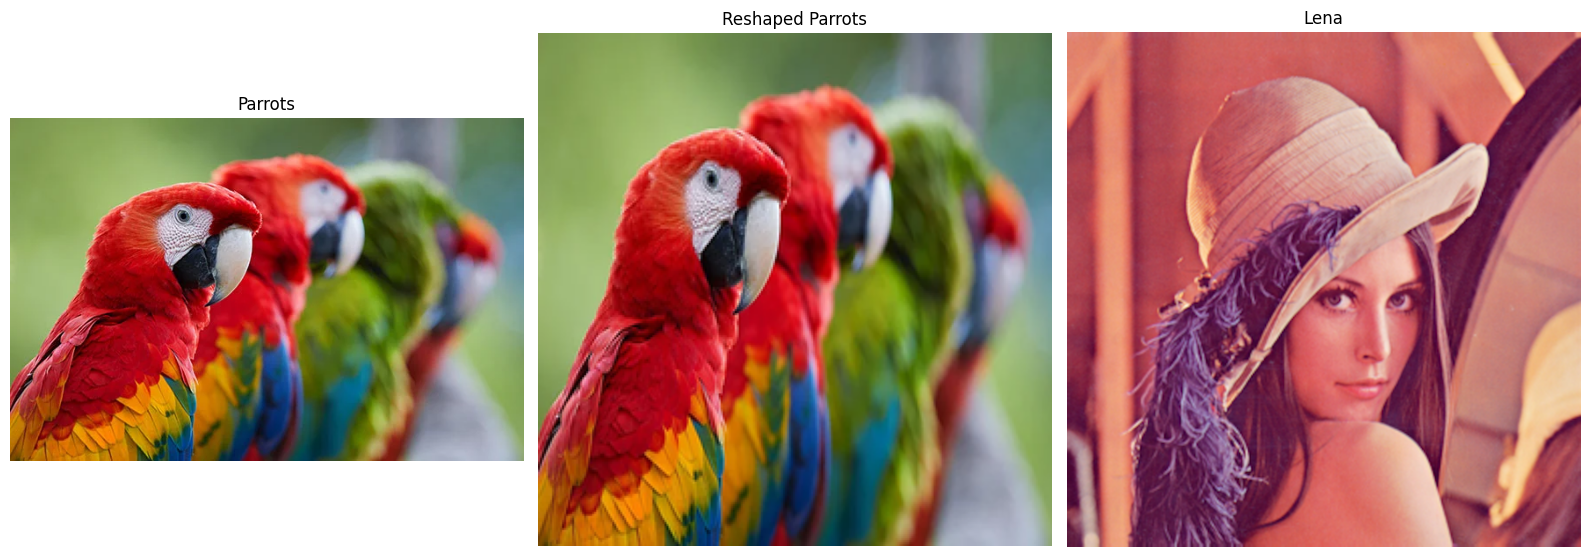

In [16]:
from typing import List
def show_images(images: List[np.array], titles:List[str]=None, rows: int=1, cols: int=None, figsize: tuple=(16, 9)):
    """
    Display a list of images in a grid.
    args:
        image_list (list of numpy arrays): List of images to be displayed.
        titles (list of str, optional): List of titles for each image. Default is None.
        rows (int, optional): Number of rows in the grid. Default is 1.
        cols (int, optional): Number of columns in the grid. If None, calculated based on the length of the image list. Default is None.
        figsize (tuple, optional): Size of the entire figure. Default is (10, 6).
    """
    if cols is None:
        cols = len(images) // rows + (len(images) % rows > 0)  # Calculate columns based on the length of the image list

    plt.figure(figsize=figsize)

    for i, image in enumerate(images, start=1):
        plt.subplot(rows, cols, i)
        plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)  # Assuming grayscale images, adjust cmap as needed
        plt.axis('off')

        if titles is not None:
            plt.title(titles[i-1])

    plt.tight_layout()
    plt.show()

# Example Usage:
# Assuming you have a list of images named 'image_list'
# Titles are optional, and you can adjust rows, cols, and figsize as needed
# show_images(image_list, titles=["Image 1", "Image 2", "Image 3"], rows=2, figsize=(12, 8))
show_images([img_1, img_2, img_3],['Parrots','Reshaped Parrots', 'Lena'])

## 1. Image Colorspace Conversion (~ 15 min)

   Colorspaces represent different ways of expressing and organizing colors in an image. Each colorspace has its own set of coordinates to represent colors, and different colorspaces are suitable for different purposes, such as image processing, computer vision, and display. Here's an explanation of some common colorspaces:
 **RGB (Red, Green, Blue):**
   - **Description:** RGB is an additive colorspace where colors are represented as combinations of red, green, and blue intensities. Each pixel in an RGB image is defined by these three color channels.
   - **Application:** Commonly used in digital displays like monitors, cameras, and scanners.
 **YUV:**
   - **Description:** YUV separates image information into luminance (Y) and chrominance (U, V) components. The Y component represents brightness, while U and V represent color information.
   - **Application:** Commonly used in video compression and broadcasting, where luminance and chrominance can be compressed differently.

Other Colorspaces include:
  - **CMY (Cyan, Magenta, Yellow)**
  - **CMYK (Cyan, Magenta, Yellow, Key/Black)**
  - **HSV (Hue, Saturation, Value)**
  - **HSL (Hue, Saturation, Lightness)**
  - **LAB (CIE L*a*b*)**


**TASK : Implémenter 2 fonctions de conversion d'espace de couleurs (par exemple : RGB -> YUV et YUV -> RGB)**

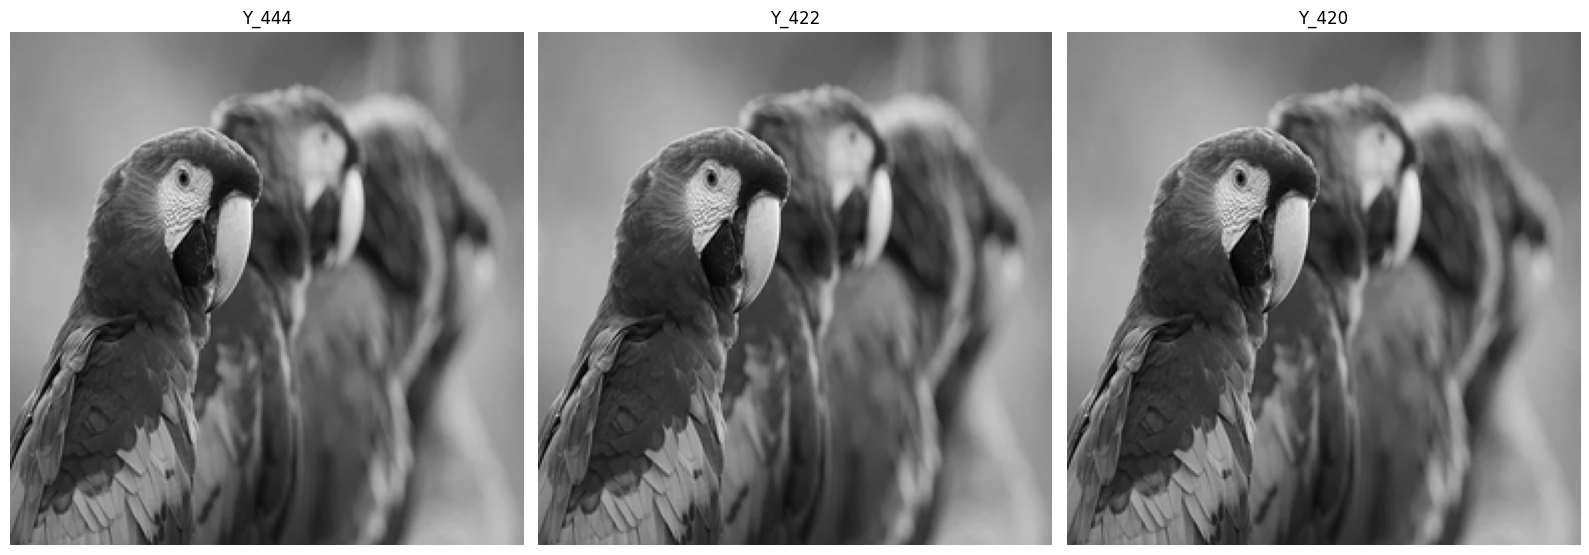

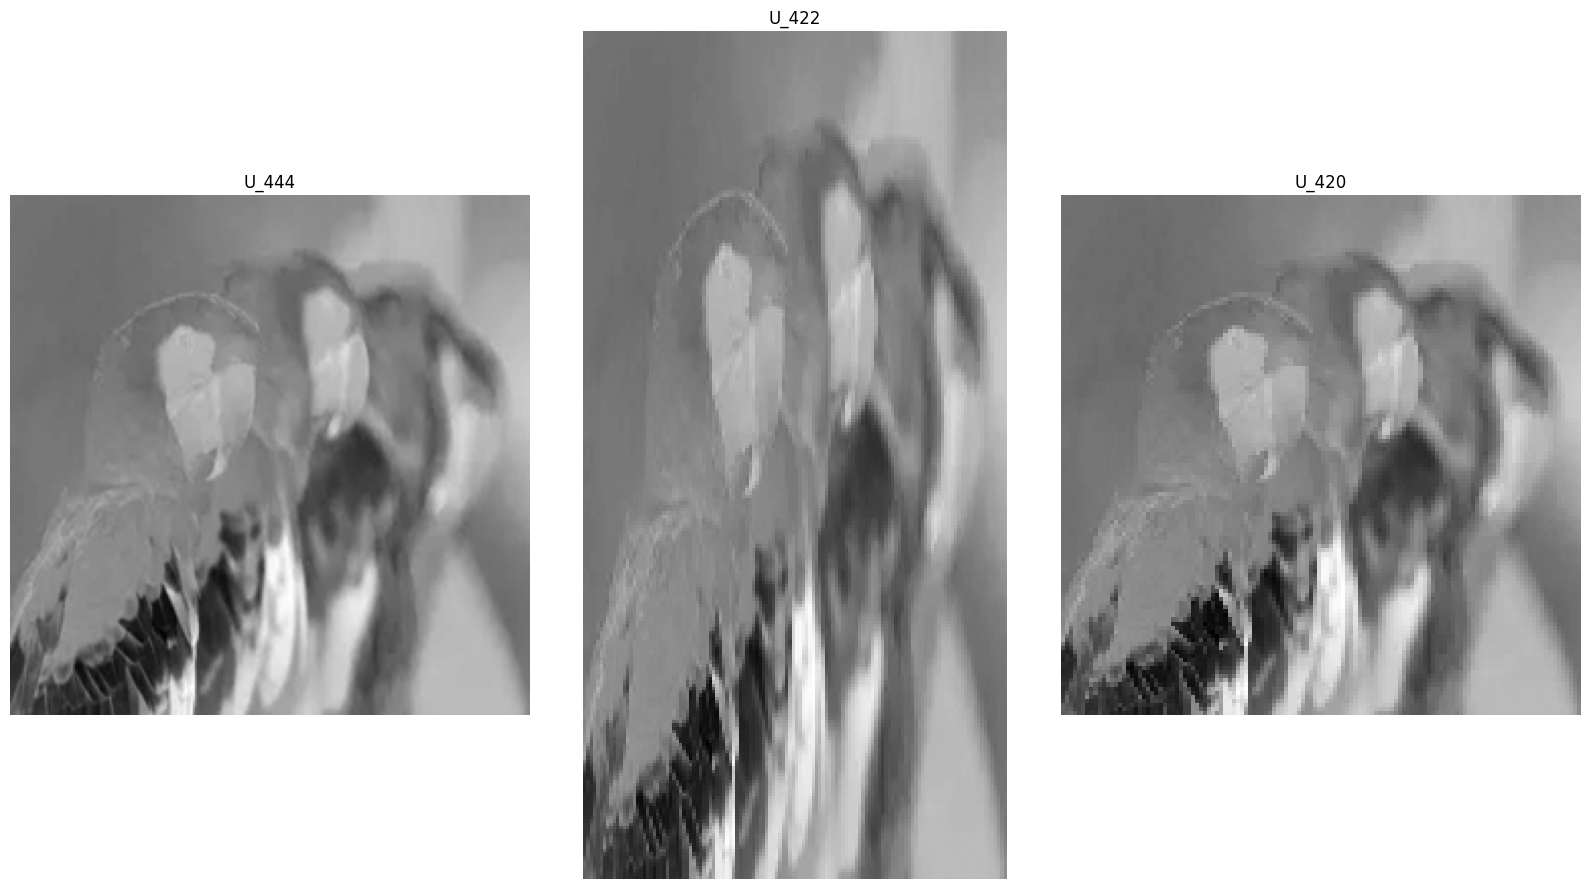

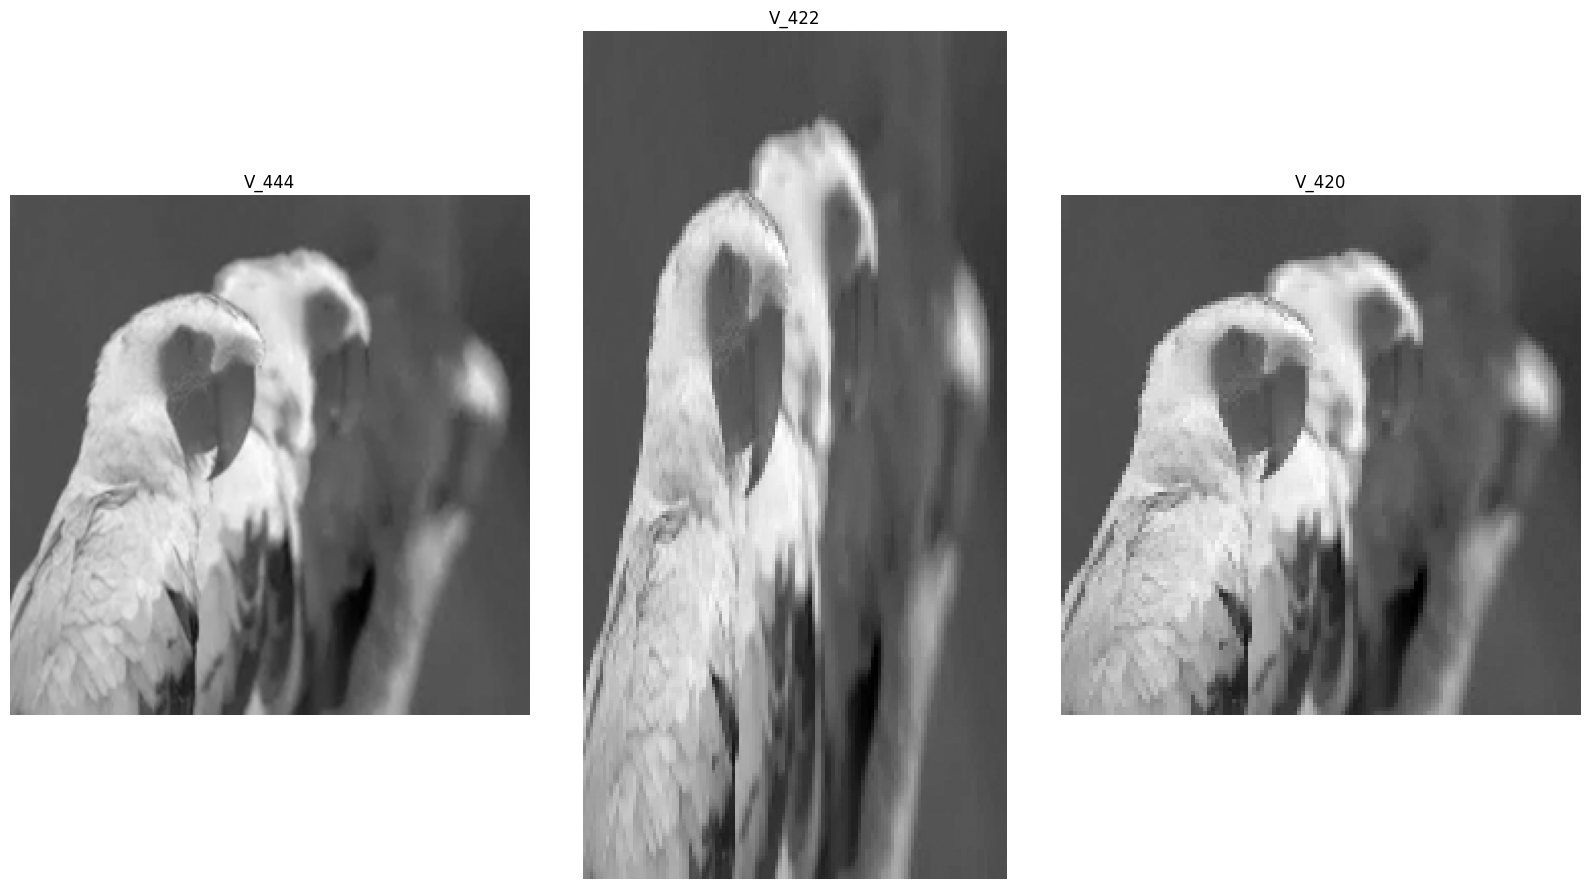

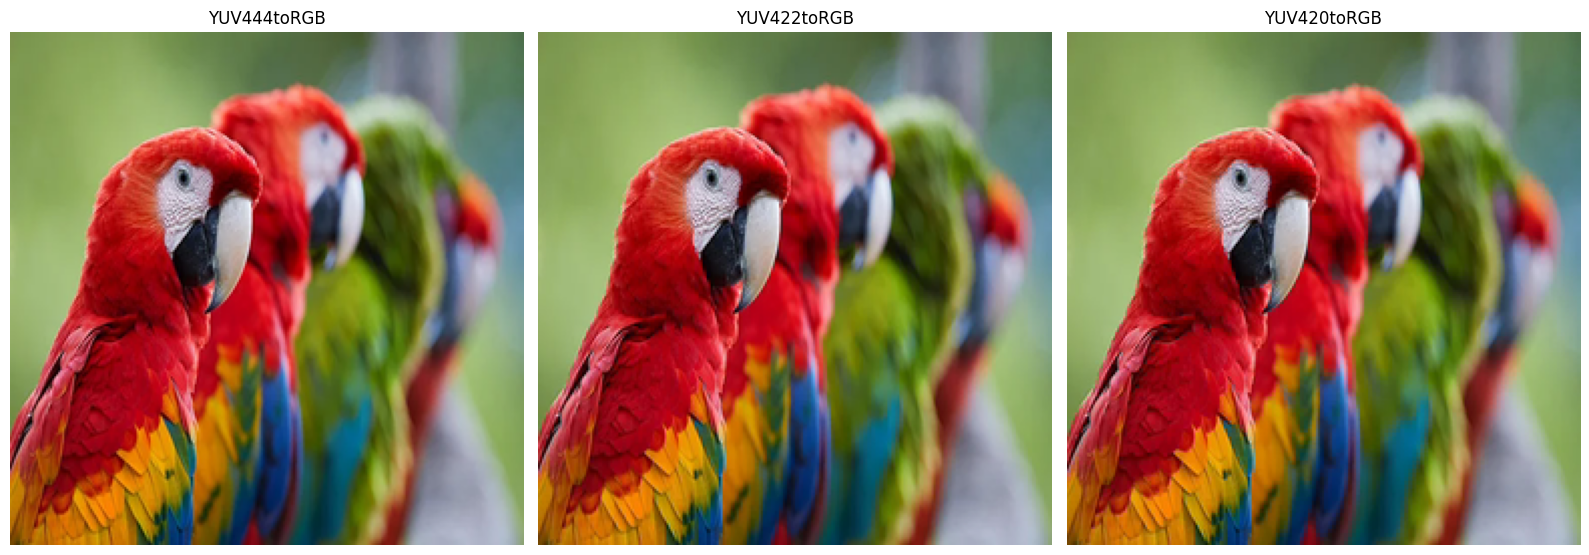

In [17]:

def rgb2yuv(rgb_image:np.array, format:str='444'):
    '''converts an RGB image to YUV(444) representation.
    args:
        rgb_image (np.array): input image in RGB color format
        format(str): out YUV format ['444','422', '420']
    returns:
        list of arrays [Y, U, V]
    '''
    # write code below
    [R,G,B] = [rgb_image[:,:,0],rgb_image[:,:,1],rgb_image[:,:,2]]
    Y = 0.299*R + 0.587*G + 0.114*B
    U = -0.14713*R - 0.28886*G + 0.436*B
    V = 0.615*R - 0.51499*G - 0.10001*B
    if format == '422':
        U = U[:, ::2]
        V = V[:, ::2]
    elif format == '420':
        U = U[::2, ::2]
        V = V[::2, ::2]
    # write code above
    return [Y,U,V]


def yuv2rgb(yuv_image:List[np.array], format:str='444'):
    '''
    Converts an image from YUV colorspace to RGB
    args:
        yuv_image (List[Y,U,V]): list of arrays.
        format (str): yuv format of the input image
    returns
        rgb_image (np.array)
    '''
    # write code bellow
    Y,U,V = yuv_image[0], yuv_image[1], yuv_image[2]
    if format == '422':
        U = np.repeat(U, 2, axis=1)
        V = np.repeat(V, 2, axis=1)
    elif format == '420':
        U = np.repeat(np.repeat(U, 2, axis=0), 2, axis=1)
        V = np.repeat(np.repeat(V, 2, axis=0), 2, axis=1)

    
    R = Y + 1.13983*V
    G = Y - 0.39465*U - 0.58060*V
    B = Y + 2.03211*U
    R = np.clip(R, 0, 255).astype(np.uint8)
    G = np.clip(G, 0, 255).astype(np.uint8)
    B = np.clip(B, 0, 255).astype(np.uint8)
    # write code above
    return np.stack([R, G, B], axis=-1)


yuv_444 = rgb2yuv(img_2)
rgb_444 = yuv2rgb(yuv_444)

yuv_422 = rgb2yuv(img_2, '422')
rgb_422 = yuv2rgb(yuv_422, '422')

yuv_420 = rgb2yuv(img_2, '420')
rgb_420 = yuv2rgb(yuv_420, '420')

show_images([yuv_444[0],yuv_422[0], yuv_420[0]], ['Y_444', 'Y_422', 'Y_420'])
show_images([yuv_444[1],yuv_422[1], yuv_420[1]], ['U_444', 'U_422', 'U_420'])
show_images([yuv_444[2],yuv_422[2], yuv_420[2]], ['V_444', 'V_422', 'V_420'])
show_images([rgb_444,rgb_422, rgb_420], ['YUV444toRGB', 'YUV422toRGB', 'YUV420toRGB'])

## 2. Block Partitioning (~ 30 min)

Block partitioning is a fundamental concept in image compression that involves dividing an image into smaller, non-overlapping blocks or tiles. Instead of compressing an entire image as a single entity, the image is broken down (PARTITIONED) into these smaller blocks (Coding Units), and compression operations are applied independently to each block. This approach is particularly prominent in transform coding techniques, such as the Discrete Cosine Transform (DCT) used in JPEG compression.

**Key Aspects of Block Partitioning:**

1. **Localization of Information:**
   - Breaking the image into blocks allows for the localization of image information. Each block represents a localized region of the image, and compression operations are applied independently to these regions.

2. **Adaptability to Local Image Characteristics:**
   - Different blocks in an image may exhibit varying levels of complexity or contain different types of content. Block partitioning allows compression algorithms to adapt to the local characteristics of each block, potentially improving compression efficiency.

3. **Ease of Parallelization:**
   - Many compression algorithms, especially those used in modern image and video coding standards, can be parallelized efficiently. Processing blocks independently allows for parallel execution, leading to faster compression and decompression.

**Example in JPEG Compression:**

In the case of JPEG compression, the image is divided into 8x8 pixel blocks. Each block undergoes a series of compression steps, including the Discrete Cosine Transform (DCT), quantization, and entropy coding. The resulting compressed data for each block can be independently transmitted or stored.

The use of block partitioning introduces a trade-off between compression efficiency and visual artifacts introduced by the block boundaries. While block artifacts may be visible, especially at lower compression levels, the benefits of reduced computational complexity and adaptability to local image characteristics often outweigh these drawbacks.

In summary, block partitioning is a crucial technique in image compression, providing a balance between efficient compression, adaptability to local content, and computational feasibility. It is a key aspect of many widely-used image compression standards.

**TASK : Implémenter un algorithme de partitionnement en blocs uniformes**

In [18]:
def create_img_from_blocks(blocks, shape, block_size):
    '''
    A helper function to re-arrange the coding blocks into a 2D grid
    (h,w,N) -> (H,W)
    h == w -> block_size
    N -> number of blocks
    '''
    img = np.zeros(shape)
    idx = 0
    for y in range(0, shape[0], block_size):  # Enlever -block_size
        for x in range(0, shape[1], block_size):  # Enlever -block_size+1
            if y + block_size <= shape[0] and x + block_size <= shape[1] and idx < blocks.shape[-1]:
                img[y:y+block_size, x:x+block_size] = blocks[:,:,idx]
                idx += 1
    return img

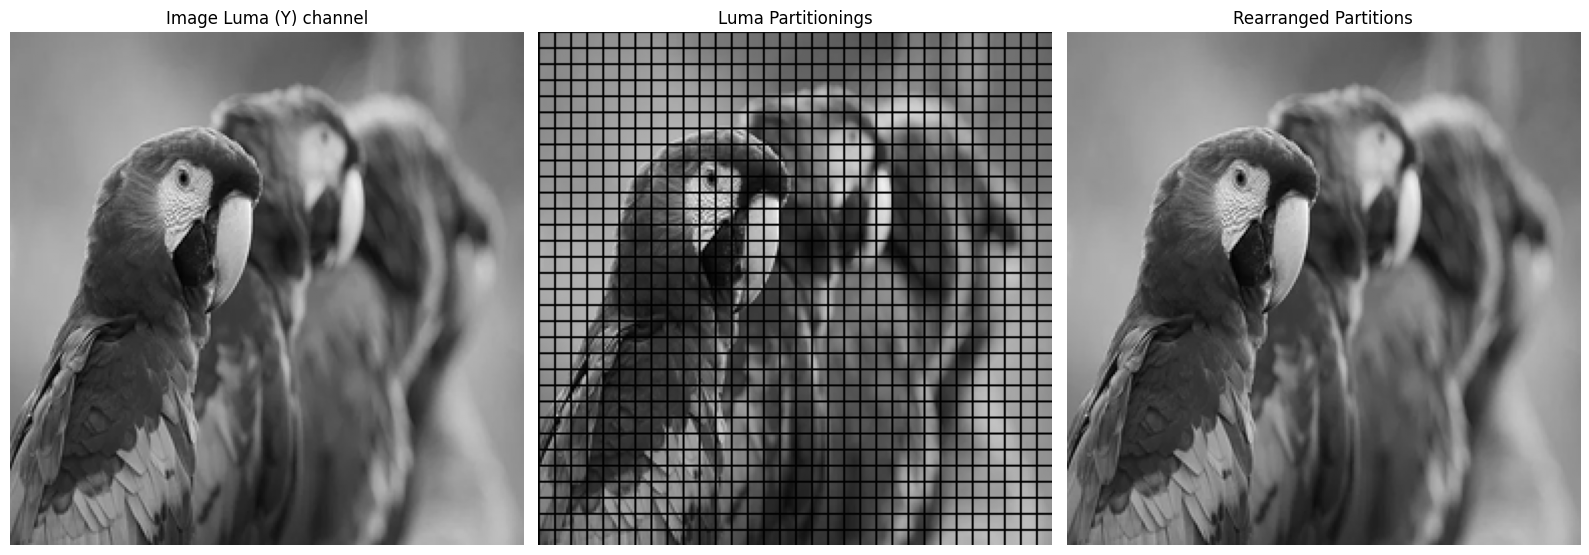

In [ ]:

def uniform_partition(image: np.array, block_size:int=8):
    '''A function to partition an image uniformly into non-overlapping coding blocks'''
    ## Write code below
    H, W = image.shape
    blocks = []
    for y in range(0, H - block_size+1, block_size):
        for x in range(0, W - block_size + 1, block_size):
            block = image[y:y+block_size, x:x+block_size]
            blocks.append(block)
    ## write code above
    return np.stack(blocks,axis=-1)


block_size=8
y_blocks = uniform_partition(yuv_420[0], block_size)
H, W = yuv_420[0].shape

#The partitioning function should return an output compatible with the "create_img_from_blocks function"
y_blocks_r = create_img_from_blocks(y_blocks,(H,W),block_size)
#visualize the 2D partitioning
part_img = np.copy(yuv_420[0])
part_img[0:H:block_size] = 1
part_img[:, 0:W:block_size] = 1
show_images([yuv_420[0],part_img, y_blocks_r], ['Image Luma (Y) channel','Luma Partitionings','Rearranged Partitions'])



In [20]:
'''Optional TASK -  Implementing an advanced quadtree partitioning algorithm'''
def quadtree_partition(image: np.array,min_block_size:int=8,max_block_size:int=64,tree_depth:int=4):
    '''OPTIONAL: Implementing a quad-tree partition algorithm
        --> Propose a decision strategy to recursively split an image into coding units
        using Quadtree split
    '''
    quadtree = {}
    return quadtree

## 3. DCT (Discrete Cosine Transform) algorithm (~ 45 min)

* The DCT algorithm converts a signal or image from its spatial domain to a frequency domain, representing the image in terms of its frequency components.
* The 2D DCT for an image involves breaking the image into small blocks (commonly 8x8 pixels) and applying the DCT transformation to each block independently. The result is a set of coefficients representing the image's spatial frequencies.

**TASK : Implémenter l'algorithme DCT sur un bloc de pixels à partir de l'image partitionnée**

In [21]:
#Here are helper functions to visualize DCT coefficients

def draw_colored_heatmap(heatmap, cmap='viridis', bg_color=(1,1,1)):
    '''Given a gray scale array (H,W,1): This function returns a heatmap showing
        the relative weight of all the values in the array.
    '''
    parts = []
    weights = []
    bg_color = np.array(bg_color).reshape((1, 1, 1, 3))
    colormap = plt.get_cmap(cmap)
    num_regions = heatmap.shape[-1]
    for i in range(num_regions):
        color = np.array(colormap(i / num_regions))[:3]
        color = color.reshape((1, 1, 1, 3))
        part = heatmap[:, :, :, i:(i + 1)]
        part = part / np.max(part, axis=(1, 2), keepdims=True)
        weights.append(part)

        color_part = part * color
        parts.append(color_part)

    weight = sum(weights)
    bg_weight = 1 - np.minimum(1, weight)
    weight = np.maximum(1, weight)
    result = sum(parts) / weight + bg_weight * bg_color
    return result

def visualize_coefficients(dct_coeff: np.array, cmap='viridis'):
    h,w,N = dct_coeff.shape
    num_blocks = np.sqrt(N)
    H = int(h*num_blocks)
    W = int(w*num_blocks)
    coeff_grid = create_img_from_blocks(dct_coeff,(H,W),h)
    coeff = coeff_grid.reshape((1,H,W,1))
    heatmap = (draw_colored_heatmap(coeff, cmap)[0]*255).astype(np.uint8)
    return heatmap


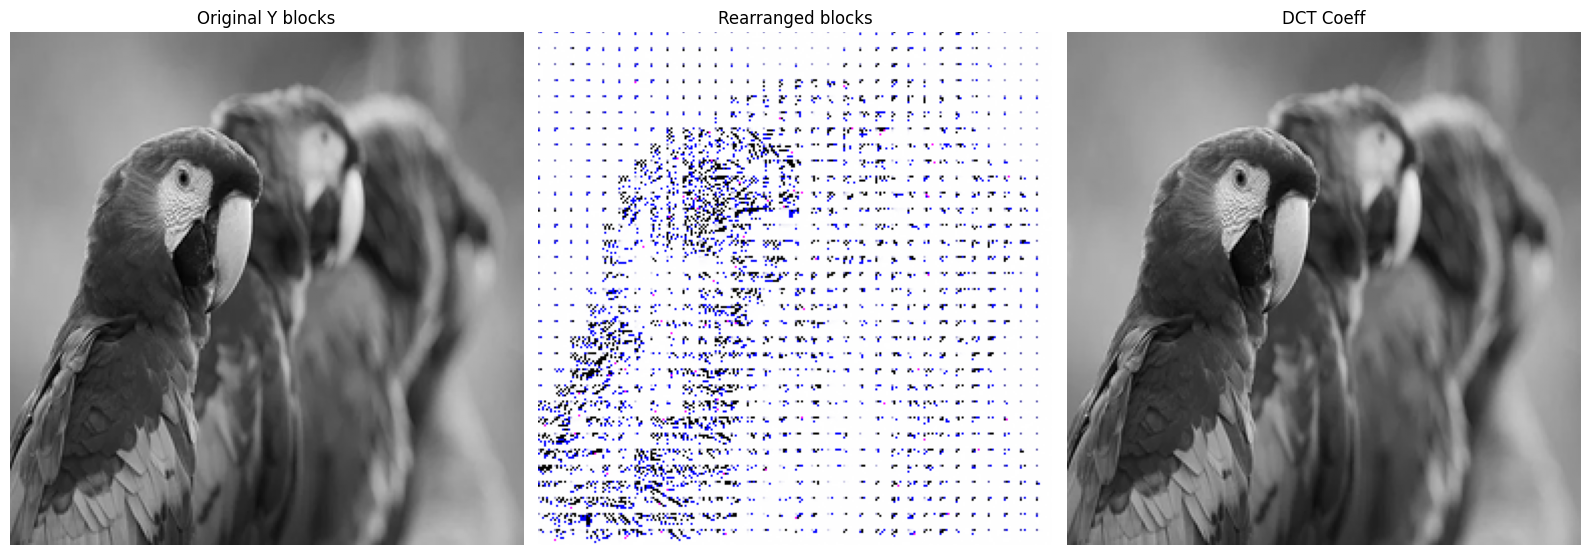

In [22]:
from scipy.fftpack import dct, idct
def compute_block_dct(coding_block: np.array)->np.array:
    '''Computes the 2D DCT decomposition of a coding block'''
    # write code below
    dct_coeff = dct(dct(coding_block, axis=0, norm='ortho'), axis=1, norm='ortho')
    #write code above
    return dct_coeff

def compute_block_idct(coeff: np.array)->np.array:
    '''Computes the inverse 2D DCT of the CU coefficients'''
    # write code below
    idct_block = idct(idct(coeff, axis=1, norm='ortho'), axis=0, norm='ortho')
    # write code above
    return idct_block


def img_dct(c_blocks: np.array)->np.array:
    '''Computes the 2D dct of all the coding blocks'''
    h,w,N = c_blocks.shape
    dct_coeff = []
    for idx in range(N):
        dct_coeff.append(compute_block_dct(c_blocks[:,:,idx]))
    return np.stack(dct_coeff, axis=-1)

def img_idct(dct_coeff:np.array)->np.array:
    '''Computes the 2D Inverse DCT of all the blocks of DCT coefficients'''
    h,w,N = dct_coeff.shape
    blocks_hat = []
    for idx in range(N):
        blocks_hat.append(compute_block_idct(dct_coeff[:,:,idx]))
    return np.stack(blocks_hat,axis=-1)

block_size = 8
H, W = yuv_444[0].shape
y_blocks = uniform_partition(yuv_420[0], block_size=block_size)
dct_coeff = img_dct(y_blocks)
y_blocks_hat = img_idct(dct_coeff)
blocks_hat = create_img_from_blocks(y_blocks_hat, (H,W),8)
coeff_heatmap = visualize_coefficients(dct_coeff,'plasma')
show_images([yuv_420[0],coeff_heatmap,blocks_hat],['Original Y blocks','Rearranged blocks','DCT Coeff','Blocks after IDCT'])

## 4. Quantization (~ 30 min)

- Explanation of quantization and its role in reducing the bit-depth of transformed coefficients.
- Introduction to quantization matrices.

**TASK : Implémenter une quantification uniforme et une dé-quantification sur les coefficients obtenues par l'étape de la DCT**

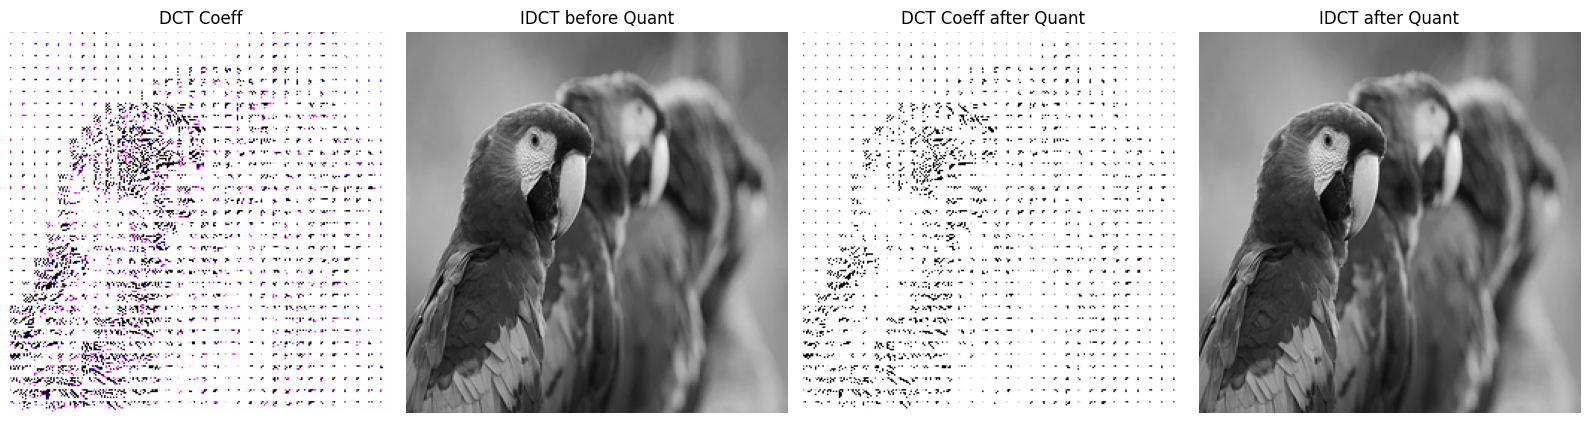

In [23]:
import numpy as np

def uniform_quantization(dct_block:np.array, num_bins:int=8):
    """
    Perform uniform quantization on the DCT coefficient blocks.

    args:
    dct_block (np.array): Input coeffients to be quantized.
    num_bins (int): Number of quantization levels.

    Returns:
    - np.array: Quantized dct coefficients.
    """
    # write code below
    step_size = 256.0 / num_bins
    quantized_coefficients = np.round(dct_block / step_size)
    # write code above
    return quantized_coefficients

def uniform_dequantization(quantized_coeff, num_bins=8):
    """
    Perform uniform dequantization on a given quantized signal.

    Parameters:
    - quantized_signal (numpy.ndarray): Quantized signal to be dequantized.
    - num_levels (int): Number of quantization levels.

    Returns:
    - numpy.ndarray: Dequantized signal.
    """
    # write code below
    step_size = 256.0 / num_bins
    dequantized_coefficients = quantized_coeff * step_size
    # write code above
    return dequantized_coefficients


def quantize(blocks: np.array, num_bins=8):
    '''A function to quantize all the CU blocks'''
    shape = blocks.shape
    quantized = np.zeros(shape)
    for idx in range(shape[-1]):
        quantized[:,:,idx] = uniform_quantization(blocks[:,:,idx], num_bins)
    return quantized

def dequantize(q_blocks: np.array, num_bins=8):
    '''A function to dequantize all the CU blocks'''
    shape = q_blocks.shape
    deq = np.zeros(shape)
    for idx in range(shape[-1]):
        deq[:,:,idx] = uniform_dequantization(q_blocks[:,:,idx],num_bins)
    return deq

num_bins = 256
#quantize the coefficients
q_blocks = quantize(dct_coeff, num_bins)
#dequantize
dq_blocks = dequantize(q_blocks, num_bins)
# Compute the IDCT on dequantized coefficients (as it was on the board)
idq_blocks = img_idct(dq_blocks)
#Visualize
blocks_hat_2 = create_img_from_blocks(idq_blocks,(H,W),8)
show_images([visualize_coefficients(dct_coeff),blocks_hat,visualize_coefficients(uniform_quantization(q_blocks)),blocks_hat_2], ['DCT Coeff','IDCT before Quant','DCT Coeff after Quant','IDCT after Quant'])

**Discussion**

* Try out different number of quantization bins **(Ideally: bin_size%2 == 0)**
* Explore the relationship between number of bins and CU block sizes
* For a given image, can you propose a combination of block_size and bin_size that has the lowest distortion.

## 5. Entropy Coding (~ 45 min)

- Introduction to entropy coding (Huffman coding, arithmetic coding).
- Explanation of how entropy coding reduces redundancy in the compressed data.
- Hands-on activity: Implement entropy coding on the quantized coefficients.

In [ ]:

# Node of a Huffman Tree
class Node:
    def __init__(self, probability, symbol, left = None, right = None):
        # probability of the symbol
        self.prob = probability
        # the symbol
        self.symbol = symbol
        # the left node
        self.left = left
        # the right node
        self.right = right
        # the tree direction (0 or 1)
        self.code = ''

def compute_symbol_probability(data):
    '''first one for calculating the probabilities of the symbols in the given data'''
    symbols = dict()
    for item in data:
        if symbols.get(item) == None:
            #create a dictionary entry for this symbol
            symbols[item] = 1
        else:
            #increment the count of this symbol in dictionary
            symbols[item] += 1
    return symbols


codes = dict()
def compute_huffman_codes(node, val=''):
    '''Generates a huffman code for the input node'''
    new_val = val+str(node.code)
    if node.left:
        compute_huffman_codes(node.left, new_val)
    if node.right:
        compute_huffman_codes(node.right, new_val)
    if (not node.left and not node.right):
        codes[node.symbol] = new_val
    return codes


def get_binary_encoding(data, coded_symbols):
    "Generates a bitstring containing all the symbol encodings"
    output = []
    for item in data:
        output.append(coded_symbols[item])
    string = ''.join([str(item) for item in output])
    return string

def huffman_encoder(quantized_dct_coefficients: List[int]):
    '''An implementation of the Huffman Coder
    args:
        quantized_dct_coefficients
    returns:
        (encoded_bitstring, coding_tree)
    '''
    # write code below
    global codes
    codes = {}
    
    # cas vide
    if len(quantized_dct_coefficients) == 0: 
        return "", None
    
    # calculer frequences
    freq = compute_symbol_probability(quantized_dct_coefficients)
    
    # un seul symbole
    if len(freq) == 1:
        symbol = list(freq.keys())[0]
        codes[symbol] = '0'
        return '0' * len(quantized_dct_coefficients), Node(freq[symbol], symbol)
    
    # creation noeuds
    nodes = []
    for s, f in freq.items():
        nodes.append(Node(f, s))
    
    # construction arbre huffman
    while len(nodes) > 1:
        nodes.sort(key=lambda x: x.prob)
        
        left = nodes.pop(0)
        right = nodes.pop(0)
        
        left.code = '0'
        right.code = '1'
        
        # fusion des symboles 
        merged_sym = str(left.symbol) + str(right.symbol)
        merged = Node(left.prob + right.prob, merged_sym, left, right)
        
        nodes.append(merged)
    
    # generer codes
    root = nodes[0]
    compute_huffman_codes(root)
    
    # encoder
    encoded = get_binary_encoding(quantized_dct_coefficients, codes)
    
    # write code above
    return encoded, root

def huffman_decoder(encoding, huffman_tree):
    '''Huffman decoder function
    args:
        encoding (str): symbols encoded using a huffman encoder
        huffman_tree: the huffman coding tree for target CU
    returns:
        list of the CU quantized dct coefficients
    '''
    # write code below
    if not encoding or huffman_tree is None:
        return []
    
    decoded = []
    current = huffman_tree

    # cas special: un seul symbole
    if current.left is None and current.right is None:
        for _ in encoding:
            decoded.append(current.symbol)
        return decoded
    
    # parcourir l'arbre
    for bit in encoding:
        if bit == '0':
            current = current.left
        elif bit == '1':
            current = current.right
        
        # on a trouvé un symbole
        if current.left is None and current.right is None:
            decoded.append(current.symbol)
            current = huffman_tree  # retour racine
    
    # write code above
    return decoded

def encoder(quantized_dct_coefficients: np.array):
    '''
    args:
        quantized_dct_coefficients
    returns:
        coded bitstream
    '''
    h,w,N = quantized_dct_coefficients.shape
    channel_bitstream = []
    for idx in range(N):
        #encode each of the blocks
        block = list(quantized_dct_coefficients[:,:,idx].astype(int).flatten())
        binary_string, coding_tree = huffman_encoder(block)
        channel_bitstream.append((binary_string, coding_tree))
    return channel_bitstream

def decoder(bitstream: List[tuple]) -> np.array:
    '''Takes an encoded bitstream and returns the decoded quantized dct coefficients'''
    # read the block encoding from the bitstream and decompress it
    decoded_quantized_coefficients = []
    for encoding, huff_tree in bitstream:
        dec_block = huffman_decoder(encoding, huff_tree)
        n_samples = int(np.sqrt(len(dec_block)))
        blk = np.zeros(((n_samples, n_samples)))
        y = 0
        for idx in range(0, len(dec_block), n_samples):
            blk[y, :] = dec_block[idx:idx+n_samples]
            y += 1
        decoded_quantized_coefficients.append(blk)
    return np.stack(decoded_quantized_coefficients, axis=-1)

**TASK : Implémenter le codage entropique sur les coefficients quantifiés**